# Training
We have explored the dataset and concluded that a simple model should be pretty good. In fact, we could simply use linear classifiers which would probably do better due to the low sample size, but we want to test GPU acceleration

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import tqdm
from torch.optim import SGD
from torch.utils.data import DataLoader

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from dataset import iris_dataframe, iris_dataframe_split, CLS_NAME, COLORS_PER_CLS

In [3]:
# Always seed your flowers!
seed = 0xDEADBEEF
np.random.seed(seed)
torch.manual_seed(seed);

Configure device check. If our kernel is configured for cuda accelerated workloads, we should see 'cuda' displayed

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device '{device}'")

Using device 'cpu'


## Prepare the dataset and validate the shape of the X's and Y's

In [5]:
data, features = iris_dataframe()
train, test = iris_dataframe_split(data)

In [6]:
from dataset import IrisDataset
from model import IrisClassifier, train_model, accuracy

### Find normalizing values

In [7]:
maximum_values = train.max()[:4].to_numpy()
maximum_values

array([7.9, 4.4, 6.7, 2.5])

In [8]:
train_ds = IrisDataset(train, maximum_values)
test_ds = IrisDataset(test, maximum_values)
train_ds[0]

(tensor([0.7089, 0.6136, 0.6269, 0.5200]), tensor([0., 1., 0.]))

Seems to return a normal result

## Prepare the model and train

In [9]:
model = IrisClassifier()

In [10]:
epochs = 20
loss_acc = train_model(model, train_ds, device, batch_size=4, max_epochs=epochs)
test_acc = accuracy(model, test_ds, device)

100%|██████████| 20/20 [00:00<00:00, 20.80it/s]


### Display the result of the training

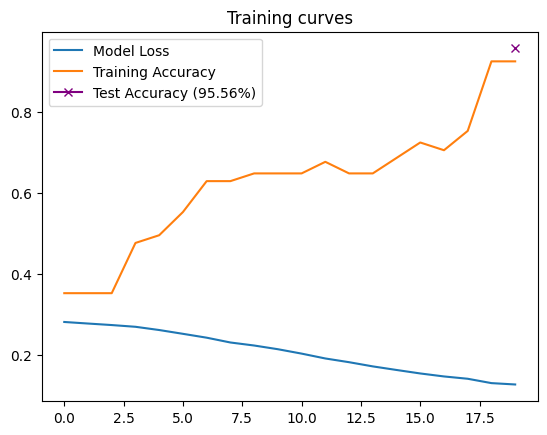

In [11]:
train_timeline = np.arange(epochs)

plt.figure()
plt.title("Training curves")
plt.plot(train_timeline, loss_acc[0, ...], label="Model Loss")
plt.plot(train_timeline, loss_acc[1, ...], label="Training Accuracy")
plt.plot(train_timeline[-1], test_acc, label=f"Test Accuracy ({test_acc*100:.2f}%)", marker='x', color='purple')
plt.legend()
plt.plot();

In real life a neural network is not a great choice with so little data 😉